# This data is collected from 'Car Dekho'. Following details of cars are included in the dataset:
1) Car name 2) Year 3) Selling Price 4) Kms driven 5) Fuel 6) Seller
type 7)Transmission 8) Owner
I will try to understand the data, analyze it, extract reports fromit, andtrytounderstandthe relationships between the different variables



Analyzing the respectivemarketinIndia using Market SegmentationAnalysis for Online VehicleBookingProduct Startup

Importing required libraries 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


Importing Dataset 

In [2]:
filename = 'car.csv'

df = pd.read_excel(filename)
df.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner


EDA/Checking the Null Values:

In [3]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [4]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [5]:
df.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [6]:
df.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [7]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [8]:
df.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [9]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [10]:
columns = ['name','year','selling_price','km_driven','fuel','seller_type','transmission','owner']
for i in columns:
    print(i)
    print(df[i].nunique())
   

name
1491
year
27
selling_price
445
km_driven
770
fuel
5
seller_type
3
transmission
2
owner
5


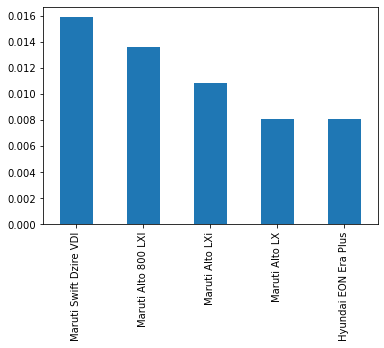

In [11]:
df["name"].value_counts(normalize = True)[:5].plot(kind = 'bar')
plt.show()

In [12]:
df["brand"] = df.name.apply(lambda x: ' '.join(x.split(' ')[:1]))
df["brand"]    

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: brand, Length: 4340, dtype: object

In [13]:
df.brand.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64

<AxesSubplot:>

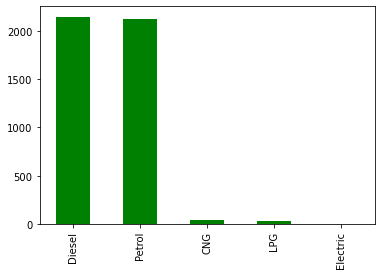

In [15]:
df["fuel"].value_counts(sort=True).plot(kind="bar", color=["green"])

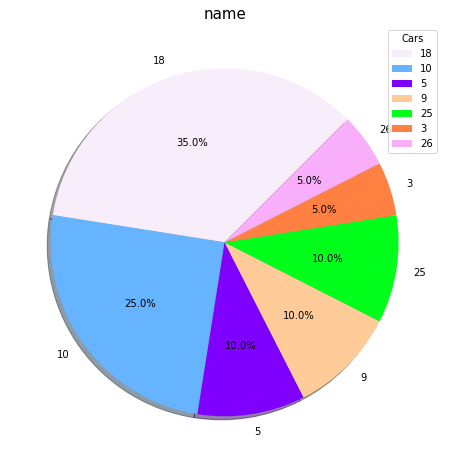

In [27]:
labels = df["brand"][:20].value_counts().index #We chose only twenty
sizes = df["brand"][:20].value_counts() # We chose only twenty
data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False)#to extract the count
x = data.index #to extract the brand name
y = data.values#to extract the count to brand 
colors = ['#F8EEFB','#66b3ff','#8000FF','#ffcc99',"#00FF1B","#FF8040","#F8AEF8"]#color choice
plt.figure(figsize = (8,8))#Determine the size of the graph
# Creating explode data
#explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)#Fomat pie
plt.title('name',color = 'black',fontsize = 15)#Fomat title
#plt.legend()#
plt.legend(title = "Cars")#title legend
#plt.legend(wedges, cars, title ="Cars",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
#myexplode = [0.2, 0, 0, 0]
plt.show()#view

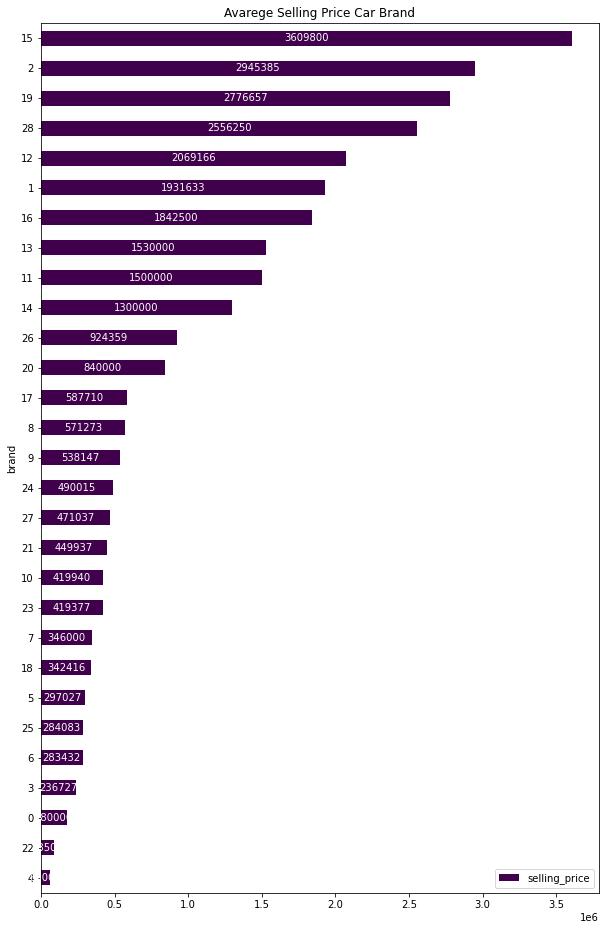

In [26]:
price = df.groupby(['brand'])[['selling_price']].mean()
price.sort_values(by='selling_price', ascending=True, inplace=True)
ax   = price.plot(kind='barh', cmap='PRGn' , figsize=(10,16) ,title= 'Avarege Selling Price Car Brand')
for c in ax.containers:
        # set the bar label
    ax.bar_label(c, fmt='%.0f',label_type='center', color='w',rotation=0)

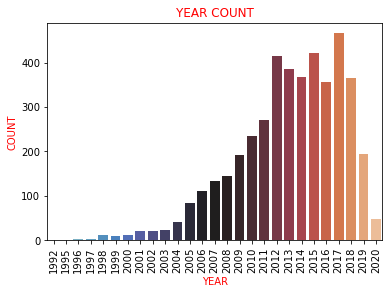

In [28]:
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("YEAR COUNT",color="RED")
plt.show()

In [16]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [17]:
data2 = df.select_dtypes(include=[object])#Extracting non-numeric columns
data2.head(3)

,name,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner,Hyundai


In [19]:
le = LabelEncoder()
df['name']= le.fit_transform(df['name'])
df['owner']= le.fit_transform(df['owner'])
df['brand']= le.fit_transform(df['brand'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,775,2007,60000,70000,Petrol,Individual,Manual,0,18
1,1041,2007,135000,50000,Petrol,Individual,Manual,0,18
2,505,2012,600000,100000,Diesel,Individual,Manual,0,10
3,118,2017,250000,46000,Petrol,Individual,Manual,0,5
4,279,2014,450000,141000,Diesel,Individual,Manual,2,9


In [20]:
#convert these columns (fuel, seller_type, transmission)
enc = OneHotEncoder(sparse = False)
X4 = df[["fuel", "seller_type", "transmission"]]
X5 = enc.fit_transform(X4)
new_col = enc.get_feature_names_out(["fuel","seller_type","transmission"])
df[new_col] = X5
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,775,2007,60000,70000,Petrol,Individual,Manual,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1041,2007,135000,50000,Petrol,Individual,Manual,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,505,2012,600000,100000,Diesel,Individual,Manual,0,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,118,2017,250000,46000,Petrol,Individual,Manual,0,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,279,2014,450000,141000,Diesel,Individual,Manual,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
new_df=df.drop(X4,axis=1)
new_df

,name,year,selling_price,km_driven,owner,brand,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,775,2007,60000,70000,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1041,2007,135000,50000,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,505,2012,600000,100000,0,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,118,2017,250000,46000,0,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,279,2014,450000,141000,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,2,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4336,601,2014,409999,80000,2,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4337,777,2009,110000,83000,2,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4338,381,2016,865000,90000,0,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


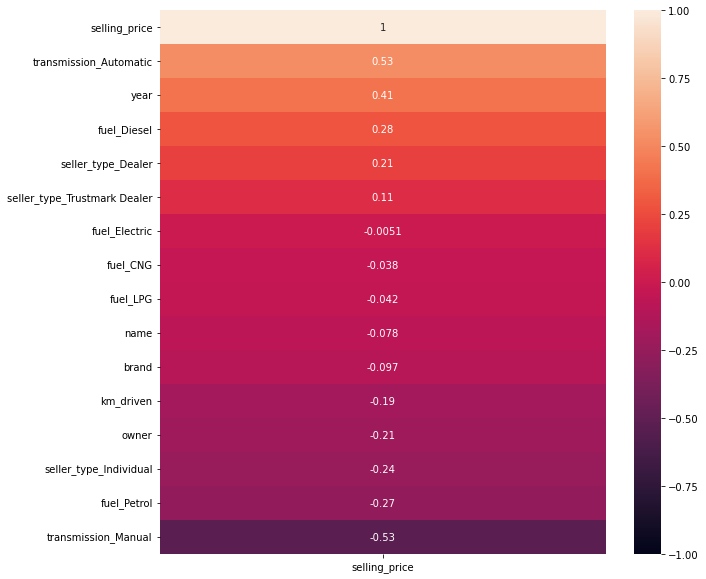

In [29]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr()[["selling_price"]].sort_values("selling_price", ascending = False),vmin = -1, vmax = +1, annot = True, ax = ax)
plt.show()

In [37]:
features=new_df.columns



In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[features])


KMeans(n_clusters=3, random_state=42)

In [39]:
cluster_labels = kmeans.labels_


In [40]:
new_df['cluster'] = cluster_labels


In [41]:
new_df

,name,year,selling_price,km_driven,owner,brand,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,cluster
0,775,2007,60000,70000,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
1,1041,2007,135000,50000,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
2,505,2012,600000,100000,0,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,118,2017,250000,46000,0,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
4,279,2014,450000,141000,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,2,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4336,601,2014,409999,80000,2,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4337,777,2009,110000,83000,2,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
4338,381,2016,865000,90000,0,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2


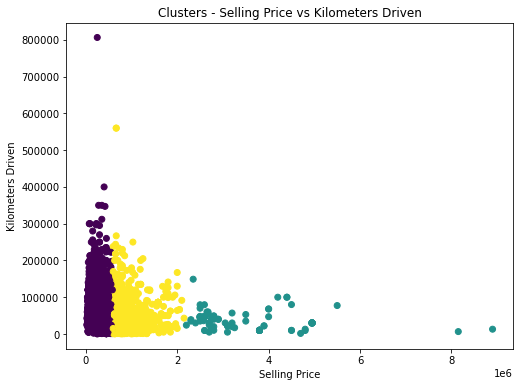

In [43]:


# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(new_df['selling_price'], new_df['km_driven'], c=new_df['cluster'], cmap='viridis')
plt.xlabel('Selling Price')
plt.ylabel('Kilometers Driven')
plt.title('Clusters - Selling Price vs Kilometers Driven')
plt.show()


# I will make things brief. Through our journey in analyzing the data, we found that

1.Best selling brand is Maruti then Hyundai
2.Manuals sell more than automatics
3.The newer the car the better it sells
4.Individual sell more
5.Petrol and Diesel sell more
6.Most sales were made in 2017

There are factors that affect on car price

1.The year, the newer the year, the higher the price
2.The KM Driving when increase price of car decreased
3.Brand and model of the car

Other factors important but these are the main factors

The conclusion drawn from the K-means clustering and visualization depends on the specific data and the features selected for clustering. In this example, the scatter plot shows the distribution of data points based on their selling price and kilometers driven, with different colors representing different clusters.

By examining the scatter plot, we can observe how the algorithm has grouped the data points into clusters based on their similarities in selling price, kilometers driven, and brand. The clusters represent distinct groups within the data, where data points within the same cluster are more similar to each other compared to those in other clusters.

The interpretation and conclusions can vary depending on the context and the specific data being analyzed. It could provide insights such as identifying groups of cars with similar price ranges and mileage, determining segments of the market based on these attributes, or identifying outliers that deviate significantly from the other clusters.

It's important to note that clustering is an unsupervised learning technique, and the conclusions drawn from the clusters should be further investigated and validated with domain knowledge or additional analysis.